## Exemplo de Features e Labels

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings


np.random.seed(42)

In [2]:
PATH = '../../datasets/classification/freelances.csv'

df_data = pd.read_csv(PATH)

# Explore Dataset

# ETL em casos de necessidade

rename_dict = {
    'unfinished': 'nao_finalizado',
    'expected_hours': 'horas_esperadas',
    'price': 'preco'
}

df_data = df_data.rename(columns=rename_dict)
df_data['finalizado'] = df_data['nao_finalizado'].map({0: 1, 1: 0})
print(df_data.head(5))

   nao_finalizado  horas_esperadas  preco  finalizado
0               1               26    192           0
1               1               88   9015           0
2               1               89   2577           0
3               1               42    275           0
4               1               39    170           0


## Informações extraídas dos dados

- 2157 linhas.
- 3 colunas (unfinished int64, expected_hours int64 e price int64).
- Não há registros nulos.


## Data visualization sobre os dados

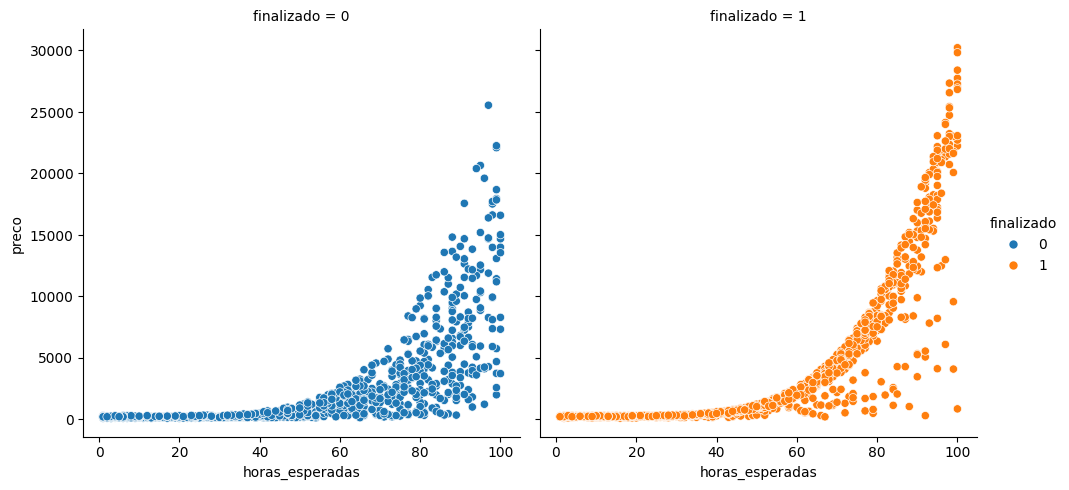

In [3]:
#sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=df_data)
sns.relplot(x='horas_esperadas', y='preco', hue='finalizado', col='finalizado', data=df_data)

In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category = ConvergenceWarning)

# Split Dataset
FEATURES = ['horas_esperadas', 'preco']
LABEL = 'finalizado'
df_X, df_Y = df_data[FEATURES], df_data[LABEL]
train_x, test_x, train_y, test_y = train_test_split(df_X, df_Y, test_size=0.25, stratify=df_Y)

# Baseliner
dummy_stratified = DummyClassifier()
dummy_stratified.fit(train_x, train_y)
dummy_accuracy = dummy_stratified.score(test_x, test_y) * 100
print('Acurácia do Dummy Stratified: %.2f%%' % dummy_accuracy)

# Modelo Linear SVC
model_linear_svc = LinearSVC(dual=True)
model_linear_svc.fit(train_x, train_y)
predictions = model_linear_svc.predict(test_x)
accuracy = accuracy_score(test_y, predictions) * 100
print('Acurácia Linear SVC: %.2f%%' % accuracy)

# Modelo SVC
scaler = StandardScaler()
scaler.fit(train_x)
train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)

model_svc = SVC()
model_svc.fit(train_x_scaled, train_y)
predictions = model_svc.predict(test_x_scaled)
accuracy_svc = accuracy_score(test_y, predictions) * 100
print('Acurácia SVC: %.2f%%' % accuracy_svc)

Acurácia do Dummy Stratified: 52.59%
Acurácia Linear SVC: 57.59%
Acurácia SVC: 67.78%


#### Criação de Baseliner

### Criação de borda de decisão

/home/dadaia/workspace/learning/3_AI/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


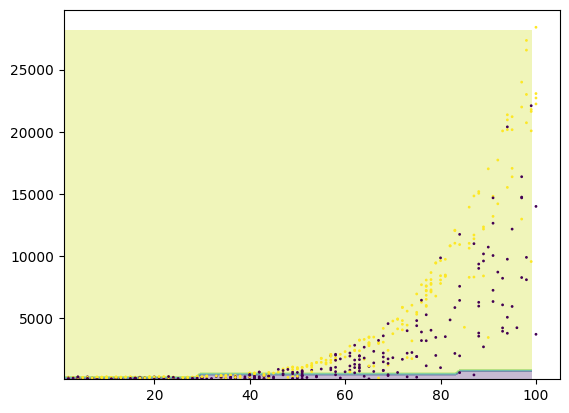

In [5]:
def create_grid(x_min, x_max, y_min, y_max, modelo):
    pixels = 100
    eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
    eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
    xx, yy = np.meshgrid(eixo_x, eixo_y)
    pontos = np.c_[xx.ravel(), yy.ravel()]
    Z = modelo.predict(pontos)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)

x_min = test_x['horas_esperadas'].min()
x_max = test_x['horas_esperadas'].max()
y_min = test_x['preco'].min()
y_max = test_x['preco'].max()
create_grid(x_min, x_max, y_min, y_max, model_linear_svc)
plt.scatter(test_x.horas_esperadas, test_x.preco, c=test_y, s=1)
plt.show()

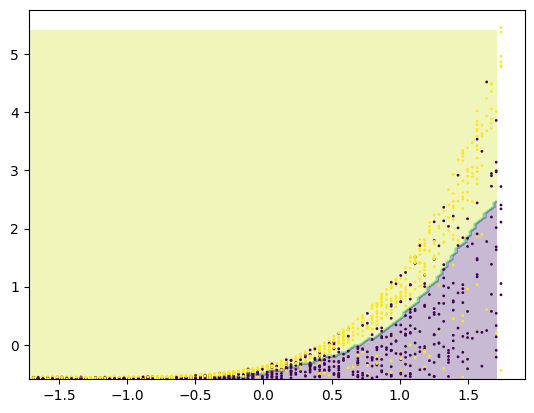

In [6]:
data_x = train_x_scaled[:, 0]
data_y = train_x_scaled[:, 1]

x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

create_grid(x_min, x_max, y_min, y_max, model_svc)
plt.scatter(data_x, data_y, c=train_y, s=1)
plt.show()